In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2Fuem9ueS5xdWlzcGVyb2phcy9Eb2N1bWVudHMvR2l0SHViL2RpZmZfZGlmZl90ZXN0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/envs/did_comparison/lib/python3.11/importlib/_bootstrap.py": 1761173985.799012, "/opt/anaconda3/envs/did_comparison/lib/python3.11/importlib/_bootstrap_external.py": 1761173985.7927878, "/opt/anaconda3/envs/did_comparison/lib/python3.11/zipimport.py": 1761173983.5879967, "/opt/anaconda3/envs/did_comparison/lib/python3.11/codecs.py": 1761173982.7493458, "/opt/anaconda3/envs/did_comparison/lib/python3.11/encodings/aliases.py": 1761173984.5492625, "/opt/anaconda3/envs/did_comparison/lib/python3.11/encodings/__init__.py": 1761173984.5448382, "/opt/anaconda3/envs/did_comparison/lib/python3.11/encodings/utf_8.py": 1761173985.17765, "/opt/anaconda3/envs/did_comparison/lib/python3.11/abc.py": 1761173982.6175346, "/opt/anaconda3/envs/did_comparison/lib/python3.11/io.py": 1761173983.0310478, "/opt/anaconda3/envs/did_comparison/lib/python3.11/stat.py": 1761173983.34824, "/opt/anaconda3/envs/did_comparison/lib/python3.11/_collections_abc.py": 1761173982.5577524, "/opt/anaconda3/en

In [2]:
#| label: setup-python
#| warning: false

import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv("sim_data.csv")

print(f"Data loaded:")
print(f"Observations: {len(df):,}")
print(f"Units: {df['id'].nunique():,}")
print(f"Periods: {df['year'].nunique()}")

# Calculate true ATT (from treated observations' true effects)
# We need to regenerate true effects since CSV doesn't have them
treat_cohorts = [0, 2012, 2014, 2016, 2018]
cohort_effects = {0: 0, 2012: 0.5, 2014: 0.3, 2016: 0.1, 2018: 0.0}
tau_0 = 1.0
gamma = 0.1

df['tau_gt'] = 0.0
mask = df['treated'] == True
df.loc[mask, 'tau_gt'] = (
    tau_0 +
    df.loc[mask, 'first_treat'].map(cohort_effects) +
    gamma * (df.loc[mask, 'year'] - df.loc[mask, 'first_treat'])
)

true_overall_att = df.loc[df['treated'], 'tau_gt'].mean()
print(f"\nTrue overall ATT: {true_overall_att:.4f}")

# Store results
results = {}

Data loaded:
Observations: 10,000,000
Units: 1,000,000
Periods: 10



True overall ATT: 1.5869


In [3]:
#| label: csdid
#| warning: false

try:
    from csdid.att_gt import ATTgt

    print("Running csdid ATTgt()...")
    print("This may take several minutes with 1M units.\n")

    start_time = time.perf_counter()

    att_gt = ATTgt(
        yname='y',
        gname='first_treat',
        idname='id',
        tname='year',
        data=df,
        control_group='nevertreated'
    )

    out_csdid = att_gt.fit(est_method='dr')  # doubly robust

    csdid_time = time.perf_counter() - start_time

    print(f"\nExecution time: {csdid_time:.2f} seconds")

    # Aggregate to dynamic effects
    agg_dynamic = out_csdid.aggte(typec='dynamic', na_rm=True)

    # Extract overall ATT from the aggregation
    if hasattr(agg_dynamic, 'att'):
        csdid_att = agg_dynamic.att
    elif hasattr(agg_dynamic, 'overall_att'):
        csdid_att = agg_dynamic.overall_att
    else:
        # Calculate from event study effects
        post_effects = [agg_dynamic.att_egt[i] for i in range(len(agg_dynamic.egt))
                       if agg_dynamic.egt[i] >= 0]
        csdid_att = np.mean(post_effects) if post_effects else None

    print(f"\nEstimated ATT: {csdid_att:.4f}" if csdid_att else "ATT not extracted")
    print(f"True ATT: {true_overall_att:.4f}")

    results['csdid'] = {
        'package': 'csdid',
        'method': 'Callaway & Sant\'Anna',
        'time': csdid_time,
        'att': csdid_att,
        'output': out_csdid
    }

except ImportError as e:
    print("Package csdid not installed.")
    print("Install with: pip install csdid")
    results['csdid'] = {
        'package': 'csdid',
        'method': 'Callaway & Sant\'Anna',
        'time': None,
        'error': str(e)
    }
except Exception as e:
    print(f"Error running csdid: {e}")
    results['csdid'] = {
        'package': 'csdid',
        'method': 'Callaway & Sant\'Anna',
        'time': None,
        'error': str(e)
    }

Package csdid not installed.
Install with: pip install csdid


In [4]:
#| label: diff-diff
#| warning: false

try:
    from diff_diff import CallawaySantAnna

    print("Running diff_diff CallawaySantAnna()...")
    print()

    cs = CallawaySantAnna()

    start_time = time.perf_counter()

    cs_results = cs.fit(
        df,
        outcome='y',
        unit='id',
        time='year',
        first_treat='first_treat',
        aggregate='event_study'
    )

    diff_diff_time = time.perf_counter() - start_time

    print(f"Execution time: {diff_diff_time:.2f} seconds")

    # Extract ATT from event study
    if hasattr(cs_results, 'event_study_effects'):
        post_effects = [v['effect'] for k, v in cs_results.event_study_effects.items()
                       if k >= 0]
        diff_diff_att = np.mean(post_effects) if post_effects else None
    else:
        diff_diff_att = None

    print(f"\nEstimated ATT (post-treatment avg): {diff_diff_att:.4f}" if diff_diff_att else "")
    print(f"True ATT: {true_overall_att:.4f}")

    results['diff_diff'] = {
        'package': 'diff_diff',
        'method': 'Callaway & Sant\'Anna',
        'time': diff_diff_time,
        'att': diff_diff_att,
        'output': cs_results
    }

except ImportError as e:
    print("Package diff_diff not installed.")
    print("Install with: pip install diff-diff")
    results['diff_diff'] = {
        'package': 'diff_diff',
        'method': 'Callaway & Sant\'Anna',
        'time': None,
        'error': str(e)
    }
except Exception as e:
    print(f"Error running diff_diff: {e}")
    results['diff_diff'] = {
        'package': 'diff_diff',
        'method': 'Callaway & Sant\'Anna',
        'time': None,
        'error': str(e)
    }

Running diff_diff CallawaySantAnna()...



Execution time: 5.77 seconds

Estimated ATT (post-treatment avg): 1.7122
True ATT: 1.5869


In [5]:
#| label: pyfixest
#| warning: false

try:
    import pyfixest as pf

    print("Running pyfixest for Sun & Abraham...")
    print()

    # Prepare data for pyfixest
    df_pf = df.copy()
    df_pf['cohort'] = df_pf['first_treat'].replace(0, np.inf)  # Never-treated = Inf

    start_time = time.perf_counter()

    # Sun & Abraham estimation
    # pyfixest uses i() for interaction-weighted estimator
    try:
        # Try sunab-style estimation
        out_pf = pf.feols(
            "y ~ sunab(cohort, year) | id + year",
            data=df_pf,
            vcov={'CRV1': 'id'}
        )
        pf_time = time.perf_counter() - start_time

        print(f"Execution time: {pf_time:.2f} seconds")
        print(out_pf.summary())

        # Extract ATT
        pf_att = out_pf.coef().mean()  # Average of event study coefficients

        results['pyfixest'] = {
            'package': 'pyfixest',
            'method': 'Sun & Abraham',
            'time': pf_time,
            'att': pf_att,
            'output': out_pf
        }

    except Exception as e:
        # Fallback to simple TWFE
        print(f"sunab not available in pyfixest, running TWFE: {e}")

        out_pf = pf.feols(
            "y ~ treated | id + year",
            data=df_pf,
            vcov={'CRV1': 'id'}
        )
        pf_time = time.perf_counter() - start_time

        print(f"\nExecution time (TWFE): {pf_time:.2f} seconds")
        print(out_pf.summary())

        results['pyfixest'] = {
            'package': 'pyfixest',
            'method': 'TWFE (sunab not available)',
            'time': pf_time,
            'att': out_pf.coef()['treated'],
            'output': out_pf
        }

except ImportError as e:
    print("Package pyfixest not installed.")
    print("Install with: pip install pyfixest")
    results['pyfixest'] = {
        'package': 'pyfixest',
        'method': 'Sun & Abraham',
        'time': None,
        'error': str(e)
    }
except Exception as e:
    print(f"Error running pyfixest: {e}")
    results['pyfixest'] = {
        'package': 'pyfixest',
        'method': 'Sun & Abraham',
        'time': None,
        'error': str(e)
    }

Running pyfixest for Sun & Abraham...



sunab not available in pyfixest, running TWFE: Unable to evaluate factor `sunab(cohort, year)`. [NameError: name 'sunab' is not defined]


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



Execution time (TWFE): 10.07 seconds
###

Estimation:  OLS
Dep. var.: y, Fixed effects: id+year
Inference:  CRV1
Observations:  10000000

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| treated       |      1.329 |        0.001 |  1150.251 |      0.000 |  1.326 |   1.331 |
---
RMSE: 0.959 R2: 0.666 R2 Within: 0.131 
None


In [6]:
#| label: dcdh-python
#| warning: false

try:
    from did_multiplegt_dyn import did_multiplegt_dyn

    print("Running did_multiplegt_dyn()...")
    print("Note: This estimator can be computationally intensive.\n")

    # Prepare data - needs binary treatment variable
    df_dcdh = df.copy()
    df_dcdh['D'] = df_dcdh['treated'].astype(int)

    # For large datasets, use a subsample first
    # The full 1M observations may be very slow
    sample_size = 100000  # Use 10% sample for tractability
    np.random.seed(123)
    sample_ids = np.random.choice(df_dcdh['id'].unique(), size=sample_size, replace=False)
    df_sample = df_dcdh[df_dcdh['id'].isin(sample_ids)].copy()

    print(f"Using {len(sample_ids):,} unit subsample ({len(df_sample):,} observations)")
    print("Full dataset estimation may require several hours.\n")

    start_time = time.perf_counter()

    try:
        out_dcdh = did_multiplegt_dyn(
            df=df_sample,
            outcome='y',
            group='id',
            time='year',
            treatment='D',
            effects=5,
            placebo=3,
            cluster='id'
        )

        dcdh_time = time.perf_counter() - start_time

        print(f"\nExecution time (10% sample): {dcdh_time:.2f} seconds")
        print(f"Estimated full data time: ~{dcdh_time * 10:.0f} seconds")
        print()
        print(out_dcdh)

        # Extract ATT if available
        if hasattr(out_dcdh, 'att') and out_dcdh.att is not None:
            dcdh_att = out_dcdh.att
        elif hasattr(out_dcdh, 'effects') and len(out_dcdh.effects) > 0:
            dcdh_att = np.mean([e for e in out_dcdh.effects if e is not None])
        else:
            dcdh_att = None

        results['did_multiplegt_dyn'] = {
            'package': 'did_multiplegt_dyn',
            'method': 'de Chaisemartin & D\'Haultfoeuille (10% sample)',
            'time': dcdh_time,
            'estimated_full_time': dcdh_time * 10,
            'att': dcdh_att,
            'output': out_dcdh
        }

    except Exception as e:
        print(f"Error during estimation: {e}")
        results['did_multiplegt_dyn'] = {
            'package': 'did_multiplegt_dyn',
            'method': 'de Chaisemartin & D\'Haultfoeuille',
            'time': None,
            'att': None,
            'error': str(e)
        }

except ImportError as e:
    print("Package did_multiplegt_dyn not installed.")
    print("Install with: pip install did-multiplegt-dyn")
    results['did_multiplegt_dyn'] = {
        'package': 'did_multiplegt_dyn',
        'method': 'de Chaisemartin & D\'Haultfoeuille',
        'time': None,
        'error': str(e)
    }
except Exception as e:
    print(f"Error: {e}")
    results['did_multiplegt_dyn'] = {
        'package': 'did_multiplegt_dyn',
        'method': 'de Chaisemartin & D\'Haultfoeuille',
        'time': None,
        'error': str(e)
    }

Package did_multiplegt_dyn not installed.
Install with: pip install did-multiplegt-dyn


In [7]:
#| label: imputation-unavailable

print("=" * 60)
print("Borusyak, Jaravel & Spiess (did_imputation)")
print("=" * 60)
print()
print("STATUS: NOT AVAILABLE IN PYTHON")
print()
print("This estimator is only available in:")
print("  - R: didimputation package")
print("  - Stata: did_imputation command")
print()

results['didimputation'] = {
    'package': 'N/A',
    'method': 'Borusyak, Jaravel & Spiess',
    'time': None,
    'att': None,
    'error': 'No Python implementation available'
}

Borusyak, Jaravel & Spiess (did_imputation)

STATUS: NOT AVAILABLE IN PYTHON

This estimator is only available in:
  - R: didimputation package
  - Stata: did_imputation command



In [8]:
#| label: twfe-python
#| warning: false

try:
    from linearmodels.panel import PanelOLS

    print("Running traditional TWFE with linearmodels...")
    print()

    # Prepare panel data structure
    df_panel = df.set_index(['id', 'year'])

    start_time = time.perf_counter()

    model = PanelOLS(
        df_panel['y'],
        df_panel[['treated']].astype(float),
        entity_effects=True,
        time_effects=True
    )
    out_twfe = model.fit(cov_type='clustered', cluster_entity=True)

    twfe_time = time.perf_counter() - start_time

    print(f"Execution time: {twfe_time:.2f} seconds")
    print(out_twfe.summary.tables[1])

    twfe_att = out_twfe.params['treated']
    print(f"\nTWFE ATT estimate: {twfe_att:.4f}")
    print(f"True ATT: {true_overall_att:.4f}")
    print(f"Bias: {twfe_att - true_overall_att:.4f}")

    results['twfe_linearmodels'] = {
        'package': 'linearmodels',
        'method': 'Traditional TWFE (biased)',
        'time': twfe_time,
        'att': twfe_att,
        'output': out_twfe
    }

except ImportError:
    print("Package linearmodels not installed.")
    print("Install with: pip install linearmodels")

    # Fallback to statsmodels
    try:
        import statsmodels.api as sm
        from statsmodels.regression.linear_model import OLS

        print("\nRunning TWFE with statsmodels (demeaned)...")

        # Demean for fixed effects
        df_fe = df.copy()
        df_fe['y_demeaned'] = df_fe.groupby('id')['y'].transform(lambda x: x - x.mean())
        df_fe['y_demeaned'] = df_fe.groupby('year')['y_demeaned'].transform(lambda x: x - x.mean())
        df_fe['treated_demeaned'] = df_fe.groupby('id')['treated'].transform(lambda x: x - x.mean())
        df_fe['treated_demeaned'] = df_fe.groupby('year')['treated_demeaned'].transform(lambda x: x - x.mean())

        start_time = time.perf_counter()
        model = OLS(df_fe['y_demeaned'], df_fe['treated_demeaned']).fit()
        twfe_time = time.perf_counter() - start_time

        print(f"Execution time: {twfe_time:.2f} seconds")
        print(f"TWFE ATT: {model.params[0]:.4f}")

        results['twfe_statsmodels'] = {
            'package': 'statsmodels',
            'method': 'Traditional TWFE (biased)',
            'time': twfe_time,
            'att': model.params[0]
        }

    except Exception as e:
        print(f"Error: {e}")

except Exception as e:
    print(f"Error running TWFE: {e}")

Running traditional TWFE with linearmodels...



Execution time: 10.94 seconds


                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
treated        1.3286     0.0012     1091.2     0.0000      1.3262      1.3310

TWFE ATT estimate: 1.3286
True ATT: 1.5869
Bias: -0.2583


In [9]:
#| label: python-summary

import pandas as pd

# Create summary table
summary_data = []
for name, r in results.items():
    summary_data.append({
        'Package': r.get('package', 'N/A'),
        'Method': r.get('method', 'N/A'),
        'Time (s)': r.get('time'),
        'ATT': r.get('att'),
        'True ATT': true_overall_att if r.get('time') else None,
        'Bias': (r.get('att') - true_overall_att) if r.get('att') else None,
        'Status': 'Error: ' + r.get('error', '') if r.get('error') else 'OK'
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 80)
print("PYTHON PACKAGE COMPARISON SUMMARY")
print("=" * 80)
print(summary_df.to_string(index=False))

# Save for comparison chapter
summary_df.to_csv("python_results.csv", index=False)


PYTHON PACKAGE COMPARISON SUMMARY
           Package                            Method  Time (s)      ATT  True ATT      Bias                                                                                                                                                                    Status
             csdid              Callaway & Sant'Anna       NaN      NaN       NaN       NaN                                                                                                                                            Error: No module named 'drdid'
         diff_diff              Callaway & Sant'Anna  5.767453 1.712237   1.58689  0.125347                                                                                                                                                                        OK
          pyfixest        TWFE (sunab not available) 10.074167 1.328615   1.58689 -0.258275                                                                                        

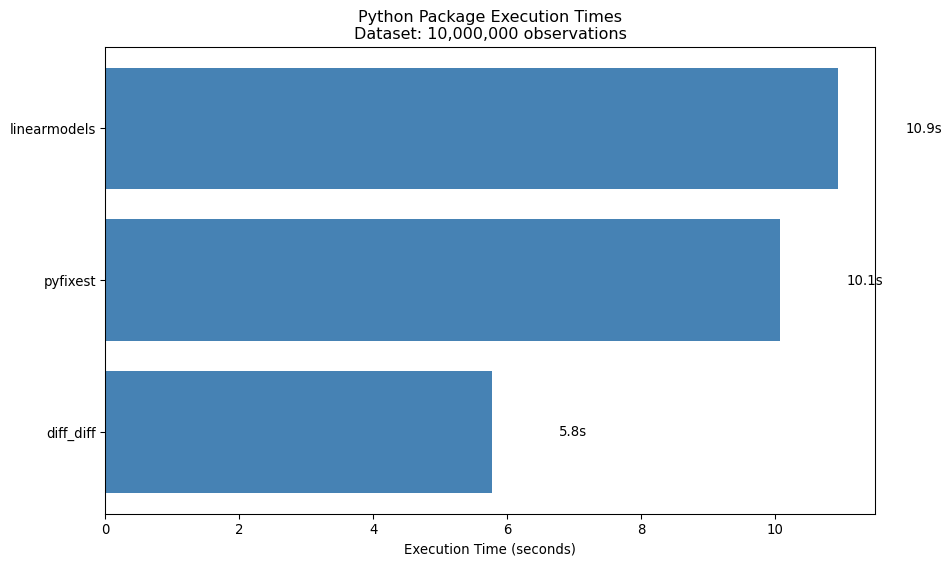

In [10]:
#| label: python-timing-plot
#| fig-cap: Execution time comparison (Python packages)

import matplotlib.pyplot as plt

# Filter to packages with valid times
timing_data = [(r['package'], r['time']) for r in results.values()
               if r.get('time') is not None]

if timing_data:
    packages, times = zip(*timing_data)

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(packages, times, color='steelblue')
    ax.set_xlabel('Execution Time (seconds)')
    ax.set_title(f'Python Package Execution Times\nDataset: {len(df):,} observations')

    # Add time labels
    for bar, t in zip(bars, times):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{t:.1f}s', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("No timing data available to plot.")